# Scooters Charging Time Analysis

**Assumptions**
- The mega charging bus can only charge a certain number of scooters, N, at a time. In my analysis, I set N=400.
- The distance of 0.5 unit on the plane is equivalent to 1 mile in real life.


**Read data**

In [5]:
import pandas as pd
df = pd.read_csv('scooter.csv')
df.head(20)

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4
5,5,0.899680,0.790893,2
6,6,0.873765,0.808707,4
7,7,0.913476,0.789742,5
8,8,0.915256,0.790685,4
9,9,0.916273,0.785860,5


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = df['xcoordinate'].astype('float64')
# y = df['ycoordinate'].astype('float64')
# plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(x, y, s=0.1)
# plt.show()

**Plot the data points on the plane**
* I was curious to see the distribute of the power levels in each location, so I used different colors for different power levels. It turns out that there is not a location where certain power levels dominate.

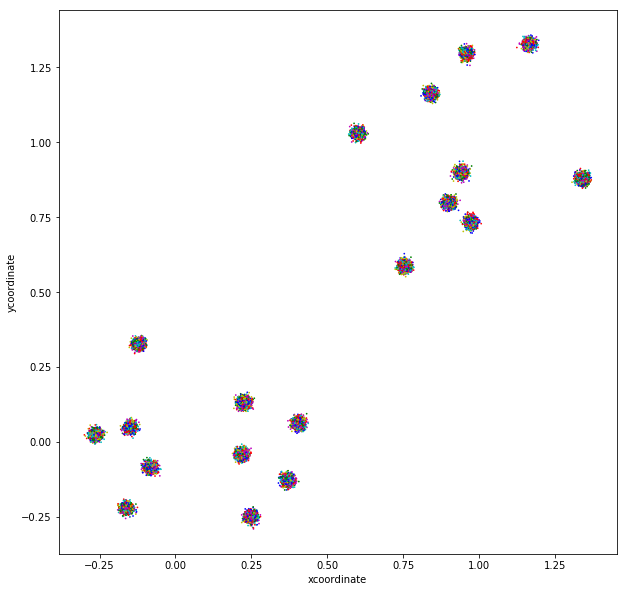

In [6]:
import numpy as np
import matplotlib.pyplot as plt
colors = np.where(df["power_level"]==0,'r','-')
colors[df["power_level"]==1] = 'y'
colors[df["power_level"]==2] = 'm'
colors[df["power_level"]==3] = 'c'
colors[df["power_level"]==4] = 'b'
colors[df["power_level"]==5] = 'g'
df.plot.scatter(x="xcoordinate",y="ycoordinate",c=colors, s=0.5,figsize=(10,10))
plt.show()

* It is quite obvious that the scooters are separated into 19 locations. Therefore, I used Kmeans clustering to separate the scooters into 19 clusters and add the "clusters" column to the dataframe.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=19).fit(df[["xcoordinate","ycoordinate"]])
labels = kmeans.labels_
df['clusters'] = labels

#Add the column into our list
columns = ["scooter_id","xcoordinate","ycoordinate","power_level"]
columns.extend(['clusters'])
df

,scooter_id,xcoordinate,ycoordinate,power_level,clusters
0,0,0.906835,0.776484,0,18
1,1,0.928587,0.804964,2,18
2,2,0.904091,0.784043,1,18
3,3,0.906752,0.804461,0,18
4,4,0.900641,0.781683,4,18
5,5,0.899680,0.790893,2,18
6,6,0.873765,0.808707,4,18
7,7,0.913476,0.789742,5,18
8,8,0.915256,0.790685,4,18
9,9,0.916273,0.785860,5,18


**Calculate charging time**
* At first, I was trying to come up with a function that can calculate the exact charging time for each location. This turned out to be more complicated than I expected since we cannot charge all of the scooters at once, and the time for each scooter varies depending on the power level.
* I decided to calculate the average number of hours it takes to charge a scooter in that location, then multiply by (total scooters in location / N =400). This will not give us the exact number, but I think the error will not be too big, since the distribution of the power levels in each location is quite close to uniform (See graphs below).

   power_level  counts
2            0     190
4            1     188
1            2     205
3            3     189
0            4     206
5            5     176
   power_level  counts
2            0     264
5            1     242
3            2     253
4            3     242
0            4     270
1            5     269
   power_level  counts
4            0     260
0            1     275
2            2     273
1            3     273
3            4     266
5            5     256
   power_level  counts
2            0     256
0            1     264
4            2     241
3            3     247
1            4     258
5            5     225
   power_level  counts
2            0     161
5            1     132
0            2     174
4            3     137
1            4     166
3            5     144
   power_level  counts
0            0     282
5            1     232
4            2     234
2            3     250
3            4     241
1            5     278
   power_level  counts
0          

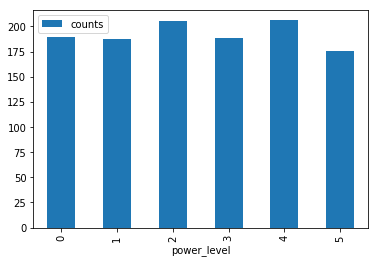

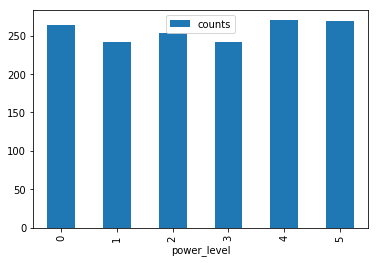

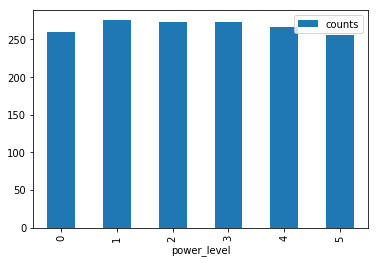

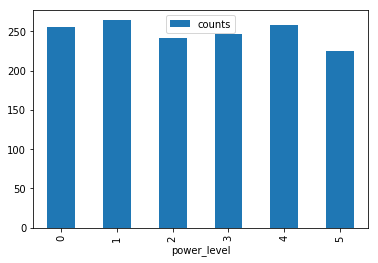

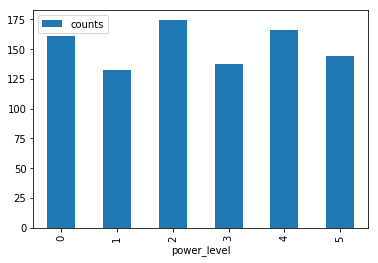

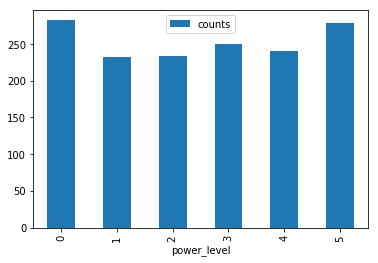

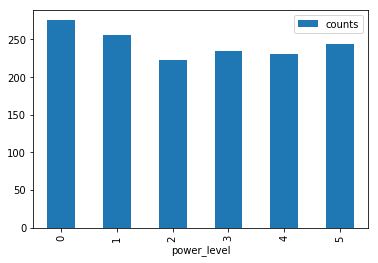

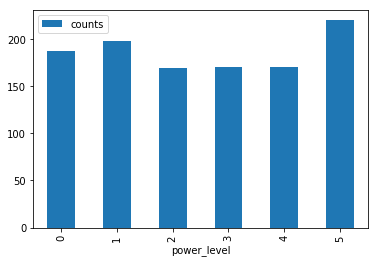

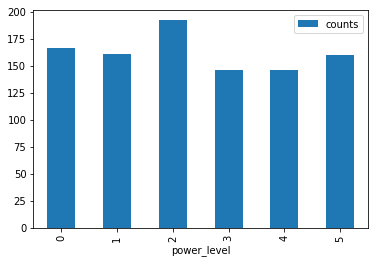

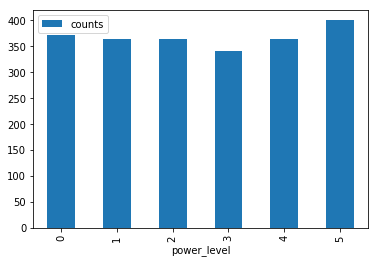

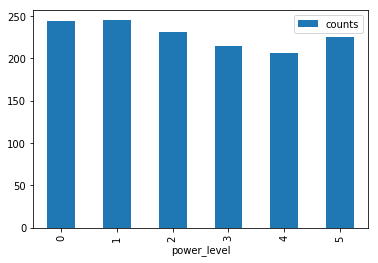

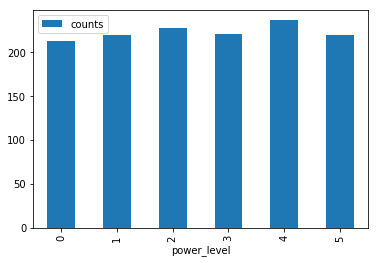

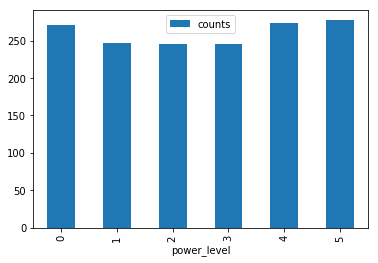

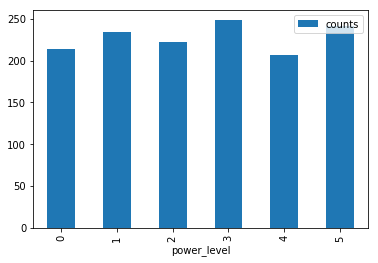

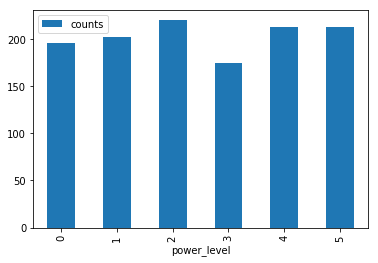

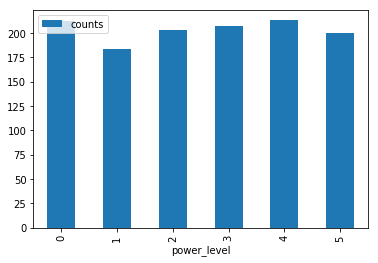

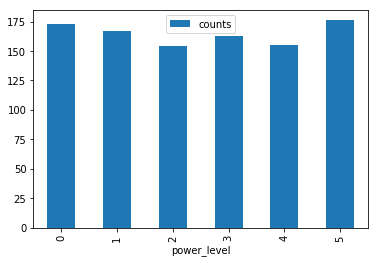

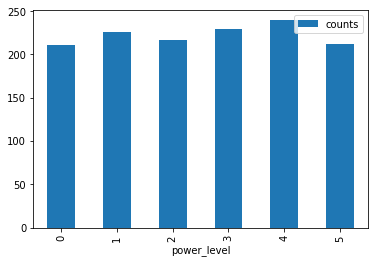

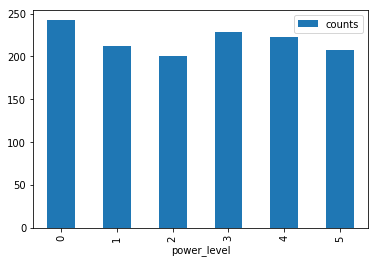

In [9]:
clusters = []
time = []
N =400
for i in range(19):
    cluster = df[df["clusters"]==i]["power_level"].value_counts().rename_axis('power_level').reset_index(name='counts')
    cluster = cluster.sort_values(by=["power_level"])
    cluster.plot.bar('power_level')
    print(cluster)

    total = cluster["counts"].sum()
    cluster["hours"] = 5 - cluster["power_level"]
    avg_per_scooter = sum(cluster["counts"]*cluster["hours"])/total
    time_at_loc = avg_per_scooter * (total/N)
    clusters.append(cluster)
    time.append(time_at_loc)

    
    

* The next thing I do is to separate those 19 clusters into 4 areas to find the center of each area, then find the center of these 4 areas.
* Since the distances between these clusters are small, I decided to just ignore them when calculating the time.
* The final time would be the total of the time to travel from (20.19, 20.19) to the center of the areas and the total of charging time in 19 locations.

In [10]:
kmeans_area = KMeans(n_clusters=4).fit(df[["xcoordinate","ycoordinate"]])
labels = kmeans_area.labels_
df['areas'] = labels


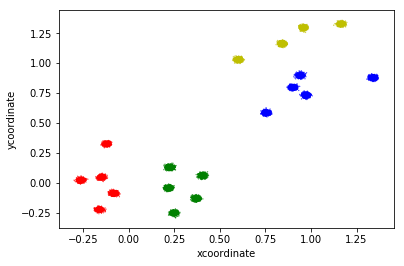

In [11]:
colors = np.where(df["areas"]==0,'r','-')
colors[df["areas"]==1] = 'y'
colors[df["areas"]==2] = 'g'
colors[df["areas"]==3] = 'b'
df.plot.scatter(x="xcoordinate",y="ycoordinate",c=colors, s=0.1, legend = True)
plt.show()

In [12]:
areas = list(set(kmeans_area.labels_))
area_centers=[]
area_centers_x = []
area_centers_y = []
for a in areas:
    clusters_in_area = list(set(df[df["areas"]==a]["clusters"]))
    cluster_centers= []
    sum_x=0
    sum_y=0
    for c in clusters_in_area:
        mean_x = df[df["clusters"]==c]["xcoordinate"].mean()
        mean_y = df[df["clusters"]==c]["ycoordinate"].mean()
        sum_x += mean_x
        sum_y += mean_y
        cluster_centers.append([mean_x,mean_y])
    area_size = len(clusters_in_area)
    area_centers_x.append(sum_x/area_size)
    area_centers_y.append(sum_y/area_size)


In [13]:
overall_center = [sum(area_centers_x)/4, sum(area_centers_y)/4]
overall_center

[0.5031278092754445, 0.48873469029364214]

In [14]:
dist_start_center = ((20.19-overall_center[0])**2 + (20.19-overall_center[1])**2)**(1/2)
dist_start_center = dist_start_center/0.5 # distance of 0.5 on the plane is equivalent to 1 mile


In [15]:
final_time = round(dist_start_center/50 + sum(time),2)
final_time

161.79

So the total of time to charge all of the scooters is 161.79 hours.